In [27]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')

In [45]:
df = pd.read_csv("C:/Users/Vinicius/Desktop/ETL/data/PRESCRIPTIONS.csv")
df2 = pd.read_csv("C:/Users/Vinicius/Desktop/ETL/data/ADMISSIONS.csv")

In [47]:
df["subject_id"]

0        42458
1        42458
2        42458
3        42458
4        42458
         ...  
10393    42430
10394    42430
10395    42430
10396    42430
10397    42430
Name: subject_id, Length: 10398, dtype: int64

In [48]:
for col in df.columns:
    print(f'"{col}"')

"row_id"
"subject_id"
"hadm_id"
"icustay_id"
"startdate"
"enddate"
"drug_type"
"drug"
"drug_name_poe"
"drug_name_generic"
"formulary_drug_cd"
"gsn"
"ndc"
"prod_strength"
"dose_val_rx"
"dose_unit_rx"
"form_val_disp"
"form_unit_disp"
"route"


In [50]:
df = df[[#'row_id', 
            'subject_id', 
            'hadm_id', #'icustay_id', 
            'startdate', 'enddate',
            'drug_type', 'drug', 'drug_name_poe', 'drug_name_generic',
            'formulary_drug_cd', 
            #'gsn', 'ndc', 
            'prod_strength', 'dose_val_rx',
            'dose_unit_rx', #'form_val_disp', 'form_unit_disp', 
            'route'
            ]].copy()

df2 = df2[[#'row_id', 
            'subject_id', 'hadm_id', 'admittime', 'dischtime',
            'deathtime', 'admission_type', #'admission_location',
            #'discharge_location', 'insurance', 'language', 'religion',
            #'marital_status', 'ethnicity', 'edregtime', 'edouttime', 'diagnosis',
            #'hospital_expire_flag', 'has_chartevents_data'
            ]].copy()

In [30]:
df.sample(5)

,row_id,subject_id,hadm_id,icustay_id,startdate,enddate,drug_type,drug,drug_name_poe,drug_name_generic,formulary_drug_cd,gsn,ndc,prod_strength,dose_val_rx,dose_unit_rx,form_val_disp,form_unit_disp,route
4775,2442502,10040,157839,272047,2147-02-23 00:00:00,2147-02-23 00:00:00,MAIN,Potassium Chloride,,,KCL40I,001255,00074665305,2mEq/ml-20ml ...,40,mEq,20,ml,IV
460,310700,10088,169938,256345,2107-01-05 00:00:00,2107-01-06 00:00:00,MAIN,DOBUTamine,,,DOBPREM,021502,00074234632,250mg Premix ...,250,mg,1,BAG,IV DRIP
3307,1564577,10061,145203,223177,2107-01-16 00:00:00,2107-01-16 00:00:00,BASE,D5W,,,D5W250,001972,00338001702,250ML BAG ...,250,ml,250,ml,IV DRIP
8659,3386944,42075,151323,298685,2166-02-17 00:00:00,2166-02-25 00:00:00,MAIN,Fentanyl Citrate,,,FENT2.5I,041385,10019003783,2.5mg/50mL Vial ...,2.5,mg,50,mL,IV DRIP
8845,3476229,40310,186361,210989,2144-07-13 00:00:00,2144-07-15 00:00:00,MAIN,Propofol,Propofol,Propofol,PROP200IG,016796,63323026920,200mg/20mL Vial ...,10,mg,0.05,VIAL,IV BOLUS


In [37]:
df["hadm_id "]

0        159647
1        159647
2        159647
3        159647
4        159647
          ...  
10393    100969
10394    100969
10395    100969
10396    100969
10397    100969
Name: hadm_id , Length: 10398, dtype: int64

In [51]:
df = df.rename(columns={'subject_id':"ID_Patient",
                            'hadm_id':'ID_medical_record',
                            'startdate':"Start_date",
                            'enddate':"End_date",
                            'drug_type':'Drug_type',
                            'drug':'Popular_drug_name',
                            'drug_name_poe':'Commercial_drug_name',
                            'drug_name_generic':'Generic_drug_name',
                            'formulary_drug_cd':'Drug_code',
                            'prod_strength':"Dose_strength",
                            'dose_val_rx':'Dose_value',
                            'dose_unit_rx':"Dose_unit",
                            'route':'Administration'})


In [52]:
df["Start_date"] = pd.to_datetime(df["Start_date"])
df["End_date"] = pd.to_datetime(df["End_date"])

In [53]:
df["Drug_code"]

0              PNEU25I
1                BISA5
2              BISA10R
3              SENN187
4             DOCU100L
             ...      
10393        NACLFLUSH
10394         ACET650R
10395           NS1000
10396          HEPBASE
10397    NICABAGSODCHL
Name: Drug_code, Length: 10398, dtype: object

<Axes: ylabel='Drug_code'>

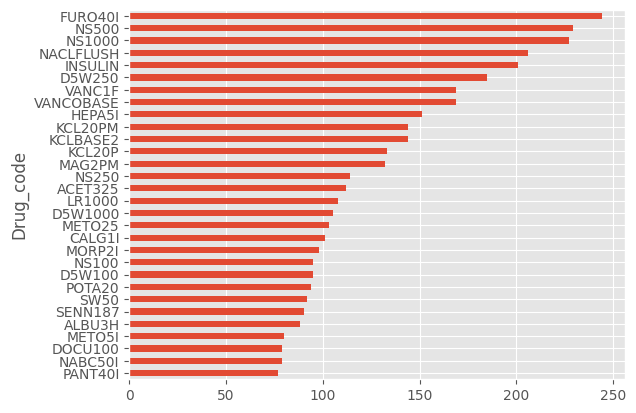

In [71]:
df["Drug_code"].value_counts().head(30).sort_values().plot(kind="barh", )


In [61]:
df["Drug_code"].unique()

#or:

#Drugs = [ ]
#for code in df["Drug_code"]:
#    if code not in Drugs:
#        Drugs.append(code)
#print(Drugs)

array(['PNEU25I', 'BISA5', 'BISA10R', 'SENN187', 'DOCU100L', 'HEPA5I',
       'SIMV10', 'ASA81', 'DONE5', 'GABA100', 'MEMA5', 'TOLT1', 'TOPR25',
       'TAMS.4', 'DOCU100', 'NACLFLUSH', 'GUAI10', 'ALBU17H', 'AMLO5',
       'FINA5', 'LEVO75', 'TIOT', 'ASA325', 'ZITHR250', 'PRED20',
       'SODI65S', 'HEPA10SYR', 'MVI', 'FERR325', 'IPRA2H', 'ALBU3H',
       'SERT100', 'SIMV40', 'LEVO100', 'ALLO100', 'PANT40', 'FURO40I',
       'CARV3125', 'METO25', 'METO5I', 'LACT30L', 'RIFA200', 'FENT2.550',
       'MIDA100', 'PROP100IG', 'ATRO1I', 'CHLO15L', 'IPRAPF',
       'PROAIR8.5H', 'MORP2I', 'NS451000', 'VIAL', 'NS500', 'VANCOBASE',
       'NS/MBP100I', 'METRBASE', 'D5W100', 'D5W250', 'NS1000', 'MORPD5W',
       'PANT40I', 'VANC1F', 'CEFE2I', 'METR500PM', 'CEFE1I', 'FURO100I',
       'LEVO4I', 'MORP100PM', 'PERC', 'PARO10', 'ASCO500', 'CREO10',
       'ACET325', 'ONDAN4I', 'DIPH25', 'CIPR500', 'GLYC17', 'MAG2PM',
       'NEUT', 'MORP15', 'ACET20/4I', 'MORP30', 'MORP4I', 'ALBU25',
       'VALS160

In [89]:
prescription_counts = df.groupby('ID_Patient').size().sort_values().reset_index(name='prescription_count')

# Filter to find hadm_ids with more than 1 prescription
multiple_prescriptions = prescription_counts[prescription_counts['prescription_count'] > 1]

print(multiple_prescriptions)

    ID_Patient  prescription_count
0        10064                  15
1        42458                  15
2        44222                  19
3        42033                  20
4        42275                  20
..         ...                 ...
89       10061                 314
90       10124                 315
91       10126                 437
92       40310                 893
93       41976                1158

[94 rows x 2 columns]


In [90]:
prescription_counts = df.groupby('ID_Patient').size().sort_values().reset_index(name='prescription_count')
med_records_counts = df.groupby('ID_medical_record').size().sort_values().reset_index(name='med_records_count')

multiple_prescriptions = prescription_counts[prescription_counts['prescription_count'] > 1,
                                             med_records_counts['med_records_count'] > 1]

print(multiple_prescriptions)

InvalidIndexError: (0     True
1     True
2     True
3     True
4     True
      ... 
89    True
90    True
91    True
92    True
93    True
Name: prescription_count, Length: 94, dtype: bool, 0      True
1      True
2      True
3      True
4      True
       ... 
117    True
118    True
119    True
120    True
121    True
Name: med_records_count, Length: 122, dtype: bool)